# Datan paloittelu ja osien tallennus uuteen tiedostoon

Tässä esimerkissä käydään läpi csv-datan lukeminen, tietyt ehdot täyttävän datan valitseminen ja saadun datan tallentaminen omana tiedostonaan.

Tuodaan tarvittavat paketit ja sen jälkeen luetaan ja tallennetaan tiedoston *DoubleMuRun2011.csv* tiedot muuttujaan *datasetti*. Tarkistetaan lisäksi tiedoston rivien määrä ja sisältö.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
datasetti = pd.read_csv('../Data/DoubleMuRun2011A.csv')
print("Tiedostossa on %d riviä."% len(datasetti))
datasetti.head()

Tiedostossa on 475465 riviä.


,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.69873,-9.510430,0.366205,1.86329,9.51748,0.194546,3.10311,...,G,9.76332,7.327710,-1.152370,6.34728,7.41776,0.775564,-0.155984,1,17.49220
1,165617,75100943,G,6.20385,-4.266610,0.456545,-4.47930,4.29097,-0.912070,3.03499,...,G,9.66898,7.273970,-2.821120,-5.71040,7.80188,-0.678625,-0.369977,1,11.55340
2,165617,75587682,G,19.28920,-4.212080,-0.651623,18.81210,4.26219,2.190460,-2.98811,...,G,9.82439,4.343940,-0.473505,8.79849,4.36967,1.449670,-0.108575,1,9.16361
3,165617,75660978,G,7.04268,-6.326780,-0.268545,3.08025,6.33248,0.469033,-3.09917,...,G,5.58571,4.474760,0.848935,-3.23185,4.55458,-0.660499,0.187488,1,12.47740
4,165617,75947690,G,7.27507,0.102966,-5.533080,-4.72122,5.53403,-0.773616,-1.55219,...,G,7.31811,-0.398831,6.940810,2.28247,6.95226,0.322677,1.628190,1,14.31590


Piirretään invariantin massan histogrammi käyttäen koko dataa

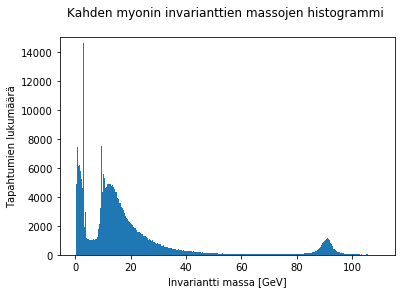

In [3]:
plt.hist(datasetti['M'], bins=500, range=(0,110))

axes = plt.gca()
axes.set_ylim([0,15000])

# Nimetään akselit ja annetaan otsikko
plt.xlabel('Invariantti massa [GeV]')
plt.ylabel('Tapahtumien lukumäärä')
plt.title('Kahden myonin invarianttien massojen histogrammi \n') # \n aloittaa uuden rivin, otsikko näyttää paremmalta

# Show the plot.
plt.show()

Histogrammissa näkyy useampi piikki, joista haluamme tarkastella oikean reunimmaista. Valitaan alkuperäisestä datasta ne rivit, joiden invariantti massa on välillä 70 < M < 110, ja tallennetaan muuttujaan *piikkidata*. Tarkistetaan, kuinka monta riviä tietoja tällä välillä on.

In [4]:
piikkidata = datasetti[(datasetti.M>70) & (datasetti.M<110)] #Z
len(piikkidata)

33177

Piirretään valitun datan perusteella invarianttien massojen histogrammi.

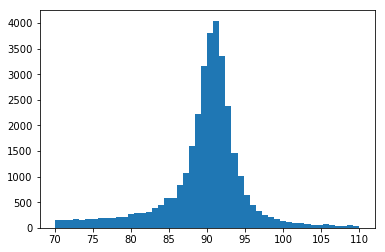

In [5]:
inv_massa = piikkidata['M']
plt.hist(inv_massa, bins=50)
plt.show()

Valittu rajausväli vaikuttaa hyvältä, joten tallennetaan muuttujan *piikkidata* tiedot omaan csv-tiedostoonsa ja nimetään se *piikki.csv*. Jätetään alkuperäisen datasetin indeksit pois ja säilytetään sarakkeiden otsikot. Tiedosto tallentuu samaan kansioon notebookin kanssa.

In [6]:
piikkidata.to_csv('piikki.csv',index=False,header=True)

Kokeillaan vielä, että saimme tallennettua oikeat tiedot lukemalla tiedosto *piikki.csv* ja tulostamalla sen viisi ensimmäistä riviä.

In [7]:
testi = pd.read_csv('piikki.csv')
testi.head()

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74969122,G,59.9226,-46.15160,29.4115,-24.4070,54.7266,-0.432382,2.574210,...,G,52.4465,30.10970,-16.39890,-39.68760,34.2859,-0.988511,-0.498717,-1,89.9557
1,165617,75138253,G,97.1011,-23.61440,6.6660,-93.9497,24.5372,-2.052350,2.866470,...,G,30.5992,-11.61340,-25.98480,11.23470,28.4619,0.385137,-1.991090,1,88.6081
2,165617,75887636,G,152.9720,7.46565,-30.7098,-149.6710,31.6042,-2.259260,-1.332320,...,G,33.5835,-9.28778,28.74570,-14.67190,30.2089,-0.468368,1.883310,1,88.2438
3,165617,75833588,G,181.8770,44.14270,-14.9498,175.8040,46.6055,2.037920,-0.326545,...,G,170.0210,-34.63010,12.32480,166.00000,36.7579,2.212820,2.799670,-1,83.0943
4,165617,75779415,G,50.2440,37.80720,-12.2044,-30.7590,39.7283,-0.712422,-0.312246,...,G,49.2396,-47.60640,8.23376,-9.50613,48.3132,-0.195513,2.970330,-1,90.3544
